In [1]:
import json
import random

import numpy as np
from pysidt import Datum, MultiEvalSubgraphIsomorphicDecisionTree
from pysidt.decomposition import atom_decomposition_noH
from pysidt.plotting import plot_tree

from molecule.molecule import Group, Molecule, ATOMTYPES

In [2]:
with open("../data/rmgdbH298CHOstablenoringnoads.json", "r") as f:
    data = json.load(f)

In [3]:
training_data = []
for i, x in enumerate(data):
    d = Datum(Molecule().from_adjacency_list(x[0], check_consistency=True), x[1])
    dup = False
    for td in training_data:
        if td.mol.is_isomorphic(d.mol):
            dup = True
            break
    if not dup:
        training_data.append(d)

In [4]:
random.shuffle(training_data)
len(training_data)

184

In [5]:
train = training_data[:150]
test = []
test = training_data[150:]

In [6]:
root = Group().from_adjacency_list("""1 * R u0 px cx""")

sidt = MultiEvalSubgraphIsomorphicDecisionTree(
    atom_decomposition_noH,
    root_group=root,
    r=[ATOMTYPES[x] for x in ["C", "O"]],
    r_bonds=[1, 2, 3, 1.5],
    r_un=[0],
    fract_nodes_expand_per_iter=0.1,
)

In [7]:
sidt.generate_tree(data=train, validation_set=test, max_nodes=4)

INFO:root:training MAE: 123708.51006128406
INFO:root:validation MAE: 159411.01350326533
INFO:root:# nodes: 1
/home/hwpang/miniforge3/envs/pysidt/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/hwpang/Projects/pysidt_dev/PySIDT/pysidt/sidt.py:666: RuntimeWarning: divide by zero encountered in double_scalars
  dy = self.data_delta[i] / len(self.mol_node_maps[datum]["mols"])
INFO:root:training MAE: 93982.14807802912
INFO:root:validation MAE: 112994.4211228777
INFO:root:# nodes: 3
/home/hwpang/miniforge3/envs/pysidt/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


adding node Root_1R->C
adding node Root_N-1R->C_Ext-1O-R


/home/hwpang/Projects/pysidt_dev/PySIDT/pysidt/sidt.py:666: RuntimeWarning: divide by zero encountered in double_scalars
  dy = self.data_delta[i] / len(self.mol_node_maps[datum]["mols"])
INFO:root:training MAE: 94095.82288070557
INFO:root:validation MAE: 113001.19823750468
INFO:root:# nodes: 4
/home/hwpang/miniforge3/envs/pysidt/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/hwpang/Projects/pysidt_dev/PySIDT/pysidt/sidt.py:666: RuntimeWarning: divide by zero encountered in double_scalars
  dy = self.data_delta[i] / len(self.mol_node_maps[datum]["mols"])
INFO:root:training MAE: 82901.0948571497
INFO:root:validation MAE: 97536.79435910459
INFO:root:# nodes: 6
/home/hwpang/miniforge3/envs/pysidt/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matr

adding node Root_N-1R->C_Ext-1O-R_2C->O


INFO:root:Postpruning based on best validation error
INFO:root:training MAE: 82901.09475774028
INFO:root:validation MAE: 97536.79418195524
INFO:root:# nodes: 6
/home/hwpang/miniforge3/envs/pysidt/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [8]:
sidt.regularize(data=train, check_data=True)

In [9]:
sidt.nodes

{'Root': Node(name=Root, rule=Rule(value=-29685.014813040696, uncertainty=2763.5180830656623, num_data=791.0), depth=0),
 'Root_1R->C': Node(name=Root_1R->C, rule=Rule(value=34316.498768907455, uncertainty=3339.9063185342525, num_data=544.0), depth=1),
 'Root_N-1R->C': Node(name=Root_N-1R->C, rule=Rule(value=-72939.65959918113, uncertainty=9920.595902763276, num_data=247.0), depth=1),
 'Root_N-1R->C_Ext-1O-R': Node(name=Root_N-1R->C_Ext-1O-R, rule=Rule(value=230.4218973171363, uncertainty=9961.155810452789, num_data=246.0), depth=2),
 'Root_N-1R->C_Ext-1O-R_2C->O': Node(name=Root_N-1R->C_Ext-1O-R_2C->O, rule=Rule(value=24170.10806879008, uncertainty=6524.384159960332, num_data=149.0), depth=3),
 'Root_N-1R->C_Ext-1O-R_N-2C->O': Node(name=Root_N-1R->C_Ext-1O-R_N-2C->O, rule=Rule(value=-44368.53134917047, uncertainty=8181.1612138928, num_data=97.0), depth=3)}

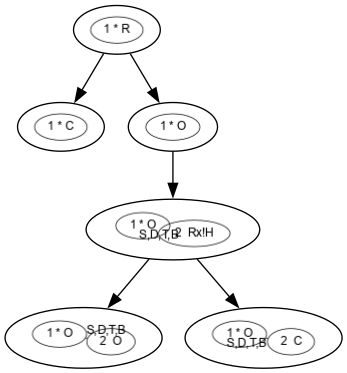

In [10]:
plot_tree(sidt, images=True)

In [11]:
train_error = [sidt.evaluate(d.mol, estimate_uncertainty=False) - d.value for d in train]
test_error = [sidt.evaluate(d.mol, estimate_uncertainty=False) - d.value for d in test]

In [12]:
np.mean(np.abs(np.array(train_error))) / 4184.0

19.813837179192227

In [13]:
np.mean(np.abs(np.array(test_error))) / 4184.0

23.311853293966358